In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


audit = pd.read_csv('audit.csv')
sns.set_style("darkgrid")

In [2]:
audit.head()

,date,name,phone,club,crowd,booked
0,2019-10-10,Sally,44123456789,Cafe de Paris,8,False
1,2019-10-7,Sally,44123456789,Circe le Soir,10,True
2,2019-10-9,Alice,44123456789,Toyroom,11,False
3,2019-10-13,Sally,44123456789,Cafe de Paris,6,True
4,2019-10-12,Karen,44123456789,Circe le Soir,10,False


In [3]:
audit['date'] = audit['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [4]:
audit['booked'] = audit['booked'].apply(lambda x: 1 if x==True else 0)
audit['weekday'] = audit['date'].apply(lambda x: x.weekday())

In [5]:
audit.head()

,date,name,phone,club,crowd,booked,weekday
0,2019-10-10,Sally,44123456789,Cafe de Paris,8,0,3
1,2019-10-07,Sally,44123456789,Circe le Soir,10,1,0
2,2019-10-09,Alice,44123456789,Toyroom,11,0,2
3,2019-10-13,Sally,44123456789,Cafe de Paris,6,1,6
4,2019-10-12,Karen,44123456789,Circe le Soir,10,0,5


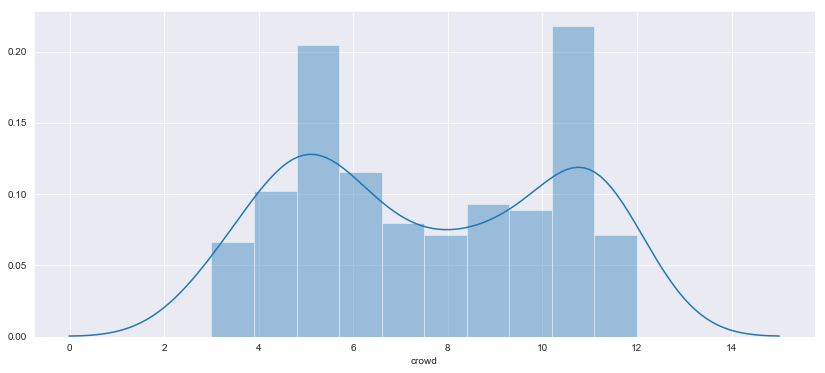

In [24]:
plt.figure(figsize=(14, 6))
sns.distplot(audit['crowd'], bins = 10, )

In [7]:
audit['crowd'].value_counts()

11    49
5     46
6     26
4     23
9     21
10    20
7     18
12    16
8     16
3     15
Name: crowd, dtype: int64

In [8]:
audit['name'].value_counts()

Kyle      54
Alice     39
Sally     39
Karen     37
Anna      26
Clara     21
Mike      10
Matyas     9
Jake       8
Istvan     7
Name: name, dtype: int64

In [9]:
audit.groupby(['name','club']).mean()[['crowd', 'booked']]

crowd    booked
name   club                              
Alice  Cafe de Paris   7.687500  0.375000
       Circe le Soir   7.571429  0.000000
       Cuckoo          7.000000  0.600000
       Tonteria        6.428571  0.428571
       Toyroom         8.750000  0.500000
Anna   Cafe de Paris   4.777778  0.444444
       Circe le Soir  10.142857  0.571429
       Tonteria        7.857143  0.285714
       Toyroom         6.666667  0.333333
Clara  Cafe de Paris   7.285714  0.428571
       Circe le Soir   6.666667  0.333333
       Cuckoo          6.000000  0.000000
       Tonteria       11.400000  0.400000
       Toyroom         6.400000  0.400000
Istvan Cafe de Paris   5.000000  0.000000
       Circe le Soir   9.000000  0.500000
       Tonteria        8.000000  0.500000
       Toyroom         4.000000  0.500000
Jake   Cafe de Paris   9.500000  0.500000
       Circe le Soir   8.333333  0.666667
       Toyroom         5.000000  1.000000
Karen  Cafe de Paris   6.250000  0.375000
       Circe le Soir   7.000000  0.125000
       Cuckoo          6.875000  0.500000
       Tonteria        7.727273  0.090909
       Toyroom         8.500000  0.000000
Kyle   Cafe de Paris   8.523810  0.285714
       Circe le Soir   8.333333  0.222222
       Cuckoo          9.090909  0.181818
       Tonteria        6.714286  0.285714
       Toyroom         7.833333  0.166667
Matyas Cafe de Paris   7.000000  0.250000
       Circe le Soir  11.000000  1.000000
       Tonteria        6.500000  0.750000
Mike   Cafe de Paris   7.400000  0.400000
       Circe le Soir   8.500000  0.250000
       Tonteria        3.000000  1.000000
Sally  Cafe de Paris   7.181818  0.272727
       Circe le Soir   8.300000  0.300000
       Cuckoo          6.500000  0.500000
       Tonteria        7.250000  0.375000
       Toyroom         6.666667  0.333333

In [10]:
audit.groupby('name').agg(lambda x:x.value_counts().index[0])[['club','crowd','booked','weekday']]

,club,crowd,booked,weekday
name,,,,
Alice,Cafe de Paris,6,0,6
Anna,Cafe de Paris,5,0,2
Clara,Cafe de Paris,12,0,6
Istvan,Toyroom,5,0,5
Jake,Cafe de Paris,5,1,6
Karen,Tonteria,5,0,6
Kyle,Cafe de Paris,11,0,5
Matyas,Cafe de Paris,11,1,1
Mike,Cafe de Paris,9,0,2


In [11]:
audit['club'].value_counts()

Cafe de Paris    86
Circe le Soir    54
Tonteria         52
Toyroom          29
Cuckoo           29
Name: club, dtype: int64

<Figure size 1152x576 with 0 Axes>

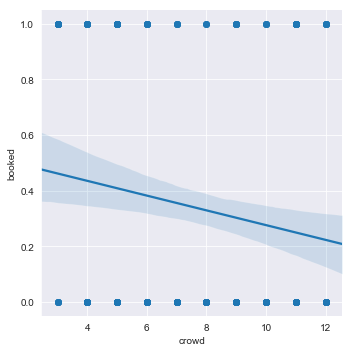

In [12]:
plt.figure(figsize=(16, 8))
sns.lmplot(data = audit, x='crowd', y='booked', palette='pastel')

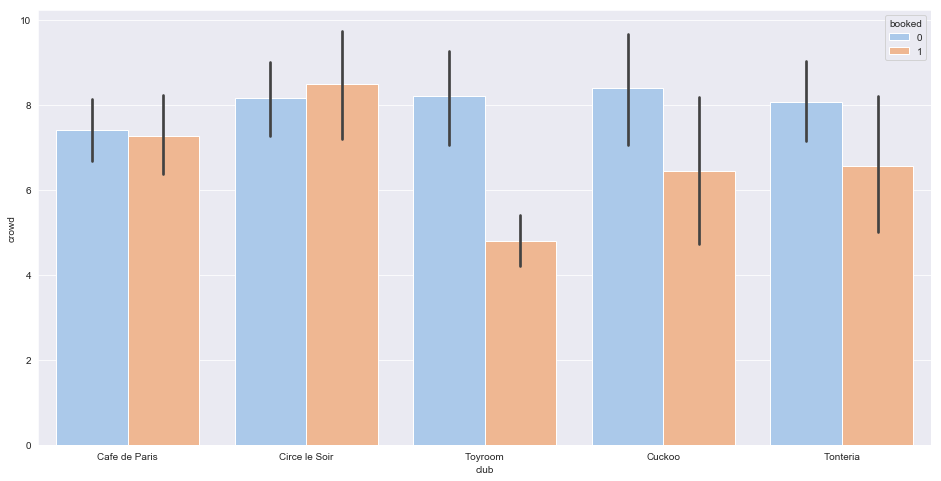

In [13]:
plt.figure(figsize=(16, 8))
sns.barplot(data = audit, x = 'club', y = 'crowd', hue='booked', palette='pastel')

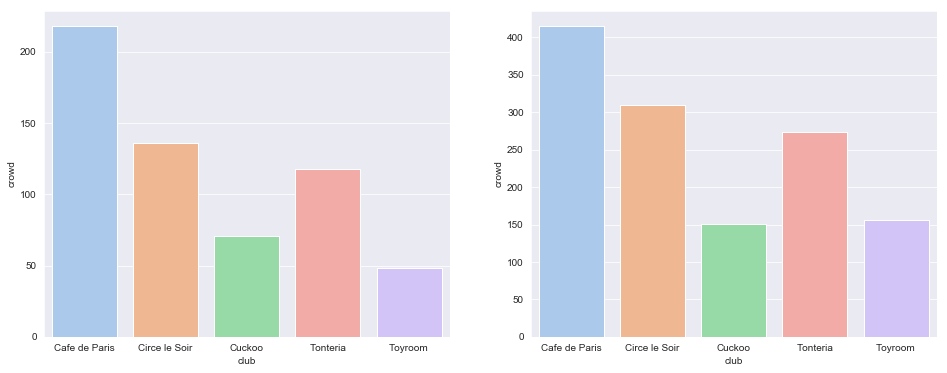

In [39]:
crowdy = audit[audit['booked']==1].groupby('club')['crowd'].sum()
crowdn = audit[audit['booked']==0].groupby('club')['crowd'].sum()

plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.barplot(x=crowdy.index, y=crowdy, palette='pastel')
plt.subplot(122)
sns.barplot(x=crowdn.index, y=crowdn, palette='pastel')


In [14]:
ind = audit['name'].unique()
col = audit['club'].unique()
bookmatrix = pd.DataFrame(index = ind, columns = col)

In [15]:
grouped = audit.groupby(['name','club']).mean()[['booked']]

In [16]:
for index, row in bookmatrix.iterrows():
    for club in row.index:
        bookmatrix[club][index] = audit[(audit['name'] == index) & (audit['club'] == club)]['booked'].mean()

In [17]:
bookmatrix.fillna(value = 0, inplace=True)

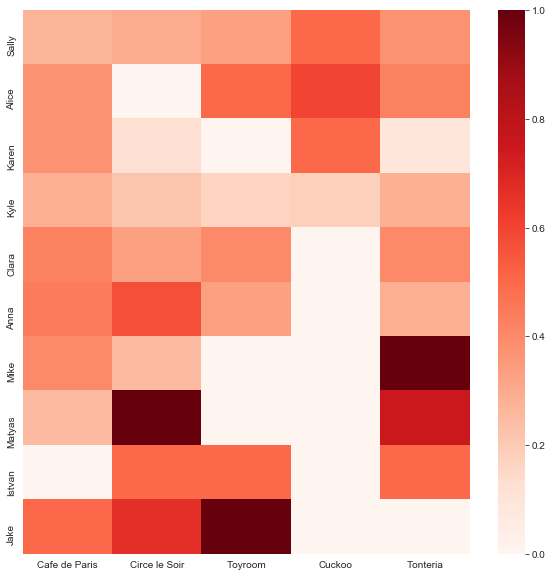

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(bookmatrix, cmap='Reds')

In [19]:
weeks = audit[audit['booked']==1].groupby('weekday').sum()['crowd']

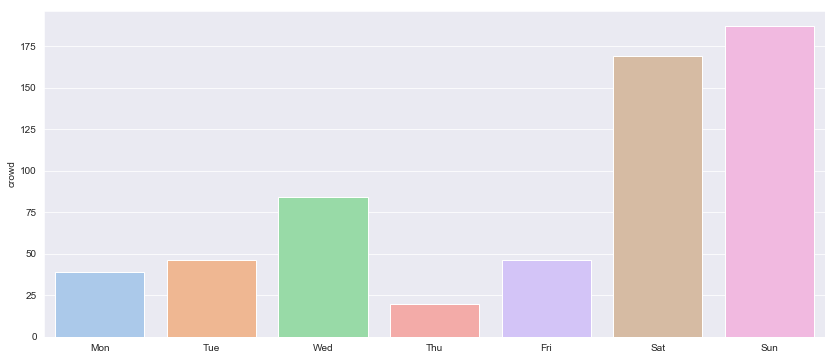

In [20]:
plt.figure(figsize=(14, 6))
sns.barplot(x=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], y=weeks, palette='pastel')

In [21]:
audit['weeknum'] = audit['date'].dt.week

In [22]:
weeknums = audit[audit['booked']==1].groupby('weeknum').sum()['crowd']

weeknum
40    254
41    322
42     15
Name: crowd, dtype: int64

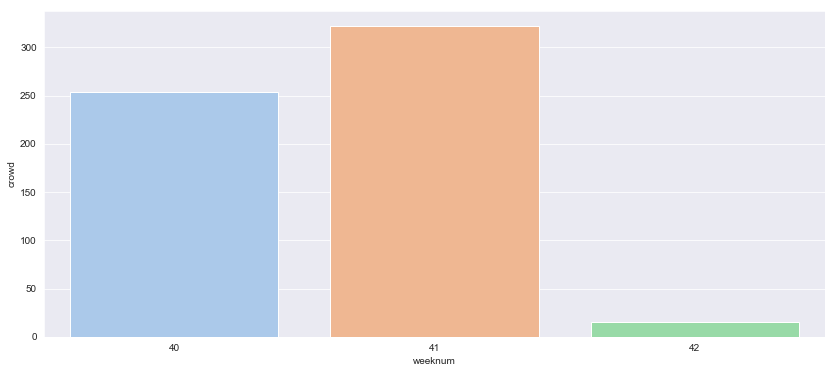

In [23]:
plt.figure(figsize=(14, 6))
sns.barplot(x=weeknums.index, y=weeknums, palette='pastel')